In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import cm
import mpl_toolkits.mplot3d.art3d as art3d

import os
import pandas as pd


matplotlib.rcParams['font.family'] = [ 'serif']
matplotlib.rcParams['agg.path.chunksize'] = 10000

In [3]:
import sys  
sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/example_filaments')
import read_fils as rf

sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/Filament_Metrics' )
import fil_metrics.metric_functions as fm 

skeleton_file_dm = '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/example_filaments/del_galaxy.NDnet_s5.up.NDskl.BRK.a.NDskl'
filaments_dm = rf.ReadFilament(skeleton_file_dm)
filament_dm_dict = filaments_dm.filament_dict
print(filament_dm_dict)

header1, ANDSKEL

ndims, 3

Comments, #No comments (RB)

Bounding box, BBOX [-9.46958,-11.2398,-10.2952] [19.1849,19.2268,23.9453]

ncrit, 142
nfils, 90
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: persistence_pair

CP field: parent_index

CP field: parent_log_index

CP field: log_field_value

CP field: field_value

CP field: cell

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type

Reading filaments took 0.00 secs.
{'ncrit': 142, 'critical_points': [{'cp_idx': 3.0, 'px': 5.24243, 'py': 0.603427, 'pz': 6.55434, 'pair_ID': 29.0, 'boundary': 0.0, 'nfil': 3, 'destID,filID': [[49, 48], [67, 66], [70, 69]], 'Field Vals': [649.3622, 5.034659, 10623.39, 29.0, 2.0, 2.0, 4.026932, 10639.77, 19.0]}, {'cp_idx': 3.0, 'px': 5.72685, 'py': -3.57222, 'pz': 3.31045, 'pair_ID': 18.0, 'boundary': 0.0, 'nfil': 4, 'destID,filID': [[23, 12], [24, 13], [24, 

In [7]:
filament_dm_dict.keys()

dict_keys(['ncrit', 'critical_points', 'nfils', 'filaments', 'nb_CP_fields', 'CP_fields', 'nb_fil_fields', 'fil_fields'])

In [8]:
#separate 'filaments' and 'critical_points' dictionaries (each is now a list of dictionaries)
fils = filament_dm_dict['filaments'] ; crit_points = filament_dm_dict['critical_points'] 

In [9]:
#number of filaments
nfils = filament_dm_dict['nfils'] ; ncrit = filament_dm_dict['ncrit']
print("# of filaments: ",nfils,"\n","# of critical points :",ncrit)

# of filaments:  90 
 # of critical points : 142


In [10]:
def plot_dm_filament(filament_idx,filament_dict,ax,colorfil='slateblue'):
    '''Helps plot filaments'''
    nsamp = filament_dict['filaments'][filament_idx]['nsamp'] 
    positions = filament_dict['filaments'][filament_idx]['px,py,pz']
    #plot the samples in between
    px = []
    py = []
    pz = []   
    for i in range(nsamp):
        px_,py_,pz_ = positions[i][0],positions[i][1],positions[i][2]
        px.append(px_)
        py.append(py_)
        pz.append(pz_)

    
    fil_line = ax.plot3D(px,py,pz,c=colorfil,lw = '2',alpha=0.4)

In [11]:
#define function to slice a dictionary list by a particular set of keys 
def dict_slice(dict, key, value):
    '''Indexes/slices a subset of a larger dictionary. 
        For use with separating critical points (since the CP id's are gven).
        Output is a list of dictionaries.'''
    N = len(dict)

    list = []
    for i in range(N):
        C = dict[i][key]
        if C == value:
            list.append(dict[i])
    return list 

In [12]:
#define a function to get the coordinates (if px,py, and pz are separate) for each type
def cp_plotter(cp):
    '''If the coordinates for a CP are separated by x,y,z 
        then this returns an array with all the values for 
        that critical point.(Perhaps too specialized - come back 
        and generalize for other use besides coordinates)'''
    N = len(cp)
    coordinates = np.zeros((N,3))
    x = 3
    
    for i in range(N): 
        coordinates[i,0] = cp[i]['px']
        coordinates[i,1] = cp[i]['py']
        coordinates[i,2] = cp[i]['pz']
    x = coordinates[:,0] ; y = coordinates[:,1] ; z = coordinates[:,2]
    return x, y, z

In [13]:
voids = dict_slice(crit_points, 'cp_idx',0)
walls = dict_slice(crit_points, 'cp_idx',1)
saddles = dict_slice(crit_points, 'cp_idx',2)   #filament saddles
peaks = dict_slice(crit_points, 'cp_idx',3)     #peaks -- nodes! 
bi_points = dict_slice(crit_points, 'cp_idx',4) #bifurcation points

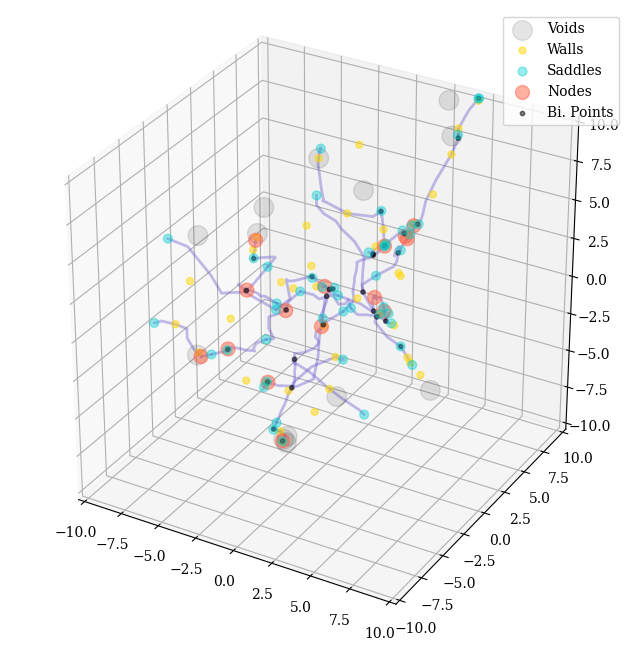

In [14]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])

for fil_idx in range(nfils): #plots the filaments 
    plot_dm_filament(fil_idx,filament_dm_dict,ax)

#plots the critical points
x,y,z = cp_plotter(voids) ; ax.scatter(x,y,z, label = 'Voids', c = 'k', s = 200, alpha = 0.1)
x,y,z = cp_plotter(walls) ; ax.scatter(x,y,z, label = 'Walls', s = 25, alpha = 0.5, c = 'gold')
x,y,z = cp_plotter(saddles) ; ax.scatter(x,y,z, label = 'Saddles', s = 40, alpha = 0.4, c = 'darkturquoise')
x,y,z = cp_plotter(peaks) ; ax.scatter(x,y,z, label = 'Nodes', s = 100, alpha = 0.5, c = 'tomato')
x,y,z = cp_plotter(bi_points) ; ax.scatter(x,y,z, label = 'Bi. Points', s = 10, alpha = 0.5, c = 'k')

ax.legend()

extent = 10
ax.set_xlim(-extent,extent)
ax.set_ylim(-extent,extent)
ax.set_zlim(-extent,extent)
plt.show()


### Need to find which critical points are ID 2 (saddles) and have nfils = 2 values 

In [19]:
check = [] ; N = len(saddles) #list of saddles with 'nfils' == 2 (as saddles should be)
for i in range(N): 
    cpidx = 2 #decide here how many nfils we want to check in saddles
    if saddles[i]['cp_idx'] == cpidx: 
        check.append(saddles[i])
len(check)

46

In [20]:
len(saddles) #sanity check, all work here is 

46

In [21]:
saddles_nfils = [] ; N = len(saddles) #list of saddles with 'nfils' == 2 (as saddles should be) 
for i in range(N):
    n_fils = 2 #decide here how many nfils we want to check in saddles
    if saddles[i]['nfil'] == n_fils: 
        saddles_nfils.append(saddles[i])
saddles_nfils

[{'cp_idx': 2.0,
  'px': -2.81356,
  'py': -2.00726,
  'pz': -1.79707,
  'pair_ID': 6.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[12, 0], [6, 1]],
  'Field Vals': [958.9152,
   5.222504,
   4112.904,
   6.0,
   -1.0,
   -1.0,
   0.6328215,
   4.293599,
   233.1]},
 {'cp_idx': 2.0,
  'px': 0.0720867,
  'py': -5.67172,
  'pz': 2.83266,
  'pair_ID': 32.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[17, 2], [18, 3]],
  'Field Vals': [5.943952,
   5.054332,
   0.4827816,
   32.0,
   -1.0,
   -1.0,
   -0.2362482,
   0.5804326,
   384.1]},
 {'cp_idx': 2.0,
  'px': -1.06399,
  'py': -1.10514,
  'pz': 1.41526,
  'pair_ID': 5.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[20, 6], [22, 7]],
  'Field Vals': [2257.297,
   5.61458,
   6694.024,
   5.0,
   -1.0,
   -1.0,
   0.4722909,
   2.966818,
   1071.1]},
 {'cp_idx': 2.0,
  'px': 5.29703,
  'py': -2.84634,
  'pz': 3.09209,
  'pair_ID': 1.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[5, 11], [1, 12]],
  'Field 

#### the IDs of these critical points should correspond to the filament dict IDs -- check

In [ ]:
# get an array of all the 


In [22]:
fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [15]:
fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [48]:
def distance(a,b):
    '''calculates distanc b/w two points'''
    dist = np.linalg.norm(b-a) ; return dist

In [30]:
N = len(fils) ; coordinates = []
for i in range(N): 
    c = fils[i]['px,py,pz']
    coordinates.append(c)
coordinates

[[[-2.81356, -2.00726, -1.79707],
  [-3.34829, -2.21085, -2.10106],
  [-3.55129, -2.20702, -2.52764],
  [-3.54704, -2.07235, -2.75681],
  [-3.62038, -2.03417, -2.75514],
  [-3.9371, -2.2373, -2.73826],
  [-4.38406, -2.60411, -2.52365],
  [-4.64688, -2.84577, -2.42487],
  [-4.78, -2.92492, -2.53663],
  [-4.79659, -2.93978, -2.5334]],
 [[-2.81356, -2.00726, -1.79707],
  [-2.42291, -1.79406, -1.743],
  [-2.6088, -2.04234, -0.950936],
  [-2.54813, -2.10565, -0.169142],
  [-2.14741, -1.74321, -0.0415953],
  [-1.84651, -1.46575, 0.0886922],
  [-1.82022, -1.45434, 0.119345]],
 [[0.0720867, -5.67172, 2.83266],
  [0.823442, -5.41287, 3.5961],
  [0.486821, -5.25539, 4.66427],
  [0.720634, -5.33619, 4.65914],
  [1.15715, -5.39709, 4.85646],
  [1.86223, -5.60071, 5.30492],
  [2.30481, -5.72357, 5.59572],
  [2.36955, -5.65897, 5.56633]],
 [[0.0720867, -5.67172, 2.83266],
  [-1.96428, -5.30094, 3.07536],
  [-3.00944, -4.59725, 3.04495],
  [-2.86515, -4.30749, 2.70464],
  [-2.83073, -4.10602, 2.41469

In [35]:
np.shape(coordinates[0])

(10, 3)

In [40]:
np.array(coordinates[0])

array([[-2.81356, -2.00726, -1.79707],
       [-3.34829, -2.21085, -2.10106],
       [-3.55129, -2.20702, -2.52764],
       [-3.54704, -2.07235, -2.75681],
       [-3.62038, -2.03417, -2.75514],
       [-3.9371 , -2.2373 , -2.73826],
       [-4.38406, -2.60411, -2.52365],
       [-4.64688, -2.84577, -2.42487],
       [-4.78   , -2.92492, -2.53663],
       [-4.79659, -2.93978, -2.5334 ]])

In [91]:
N = len(coordinates) #work in progress

coords = []

for i in range(N):
    array = np.array(coordinates[i])
    coords.append(array)

coords #prints list of arrays (?) 

[array([[-2.81356, -2.00726, -1.79707],
        [-3.34829, -2.21085, -2.10106],
        [-3.55129, -2.20702, -2.52764],
        [-3.54704, -2.07235, -2.75681],
        [-3.62038, -2.03417, -2.75514],
        [-3.9371 , -2.2373 , -2.73826],
        [-4.38406, -2.60411, -2.52365],
        [-4.64688, -2.84577, -2.42487],
        [-4.78   , -2.92492, -2.53663],
        [-4.79659, -2.93978, -2.5334 ]]),
 array([[-2.81356  , -2.00726  , -1.79707  ],
        [-2.42291  , -1.79406  , -1.743    ],
        [-2.6088   , -2.04234  , -0.950936 ],
        [-2.54813  , -2.10565  , -0.169142 ],
        [-2.14741  , -1.74321  , -0.0415953],
        [-1.84651  , -1.46575  ,  0.0886922],
        [-1.82022  , -1.45434  ,  0.119345 ]]),
 array([[ 0.0720867, -5.67172  ,  2.83266  ],
        [ 0.823442 , -5.41287  ,  3.5961   ],
        [ 0.486821 , -5.25539  ,  4.66427  ],
        [ 0.720634 , -5.33619  ,  4.65914  ],
        [ 1.15715  , -5.39709  ,  4.85646  ],
        [ 1.86223  , -5.60071  ,  5.30492  ]

In [ ]:
N = len(coordinates) #work in progress 

for i in range(N):
    array = np.array(coordinates[i])
    print(array) #gives many "little" arrays of px,py,pz values for each filament 

In [ ]:
N = len(coordinates)

for i in range(N):
    array = np.array(coordinates[i])
    print(array)

In [50]:
array

array([[0.287103, 6.25466 , 1.18162 ],
       [0.284161, 6.26514 , 1.18052 ],
       [0.28122 , 6.27562 , 1.17942 ]])

In [51]:
distance(array[0], array[1])

0.010940555927373467

In [61]:
#check that this works 
x1 = array[0,0] ; y1 = array[0,1] ; z1 = array[0,2]
x2 = array[1,0]; y2 = array[1,1] ; z2 = array[1,2]

np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)

0.010940555927373467

In [69]:
a = array[0] ; b = array[1] #faster way to do this 
A = np.sum((a-b)**2)
np.sqrt(A)

0.010940555927373467

In [84]:
N = len(array)

for i in range(N): 
    a = array[i] ; b = array[1:2] #start:stop:step
b

array([[0.284161, 6.26514 , 1.18052 ]])

In [137]:
#try with array first (one iteration) then with coords to do this over all the filaments 
a = coords[0] # makes this simpler 
for i in range(len(coords[0])):
    a = coords[0] ; a = a[0::2] ; b = coords[0] ; b = b[1::2]
a - b #shows that this approach works when 'a' and 'b' are the same size

array([[ 0.53473,  0.20359,  0.30399],
       [-0.00425, -0.13467,  0.22917],
       [ 0.31672,  0.20313, -0.01688],
       [ 0.26282,  0.24166, -0.09878],
       [ 0.01659,  0.01486, -0.00323]])

In [135]:
coords[0] #to compare to above arrays (a and b separately)

array([[-2.81356, -2.00726, -1.79707],
       [-3.34829, -2.21085, -2.10106],
       [-3.55129, -2.20702, -2.52764],
       [-3.54704, -2.07235, -2.75681],
       [-3.62038, -2.03417, -2.75514],
       [-3.9371 , -2.2373 , -2.73826],
       [-4.38406, -2.60411, -2.52365],
       [-4.64688, -2.84577, -2.42487],
       [-4.78   , -2.92492, -2.53663],
       [-4.79659, -2.93978, -2.5334 ]])

In [141]:
#now figure out what to do if 'a' and 'b' are different sizes 
coords[1]

array([[-2.81356  , -2.00726  , -1.79707  ],
       [-2.42291  , -1.79406  , -1.743    ],
       [-2.6088   , -2.04234  , -0.950936 ],
       [-2.54813  , -2.10565  , -0.169142 ],
       [-2.14741  , -1.74321  , -0.0415953],
       [-1.84651  , -1.46575  ,  0.0886922],
       [-1.82022  , -1.45434  ,  0.119345 ]])

In [149]:
a = coords[1]
for i in range(len(coords[0])):
    a = coords[1] ; a = a[0::2] ; b = coords[1] ; b = b[1::2] # wrong approach - won't work 
a - b 

ValueError: operands could not be broadcast together with shapes (4,3) (3,3) 

In [150]:
coords[1]

array([[-2.81356  , -2.00726  , -1.79707  ],
       [-2.42291  , -1.79406  , -1.743    ],
       [-2.6088   , -2.04234  , -0.950936 ],
       [-2.54813  , -2.10565  , -0.169142 ],
       [-2.14741  , -1.74321  , -0.0415953],
       [-1.84651  , -1.46575  ,  0.0886922],
       [-1.82022  , -1.45434  ,  0.119345 ]])

In [177]:
#different approach for iterating 
a = coords[1]
a[1:]

array([[-2.42291  , -1.79406  , -1.743    ],
       [-2.6088   , -2.04234  , -0.950936 ],
       [-2.54813  , -2.10565  , -0.169142 ],
       [-2.14741  , -1.74321  , -0.0415953],
       [-1.84651  , -1.46575  ,  0.0886922],
       [-1.82022  , -1.45434  ,  0.119345 ]])

In [178]:
a[:-1]

array([[-2.81356  , -2.00726  , -1.79707  ],
       [-2.42291  , -1.79406  , -1.743    ],
       [-2.6088   , -2.04234  , -0.950936 ],
       [-2.54813  , -2.10565  , -0.169142 ],
       [-2.14741  , -1.74321  , -0.0415953],
       [-1.84651  , -1.46575  ,  0.0886922]])

In [182]:
for i in range(len(coords[1])): ## this is the method that works! 
    c = coords[1]
    a = c[1:] ; b = c[:-1]
a - b

array([[ 0.39065  ,  0.2132   ,  0.05407  ],
       [-0.18589  , -0.24828  ,  0.792064 ],
       [ 0.06067  , -0.06331  ,  0.781794 ],
       [ 0.40072  ,  0.36244  ,  0.1275467],
       [ 0.3009   ,  0.27746  ,  0.1302875],
       [ 0.02629  ,  0.01141  ,  0.0306528]])

In [185]:
coords[1]

array([[-2.81356  , -2.00726  , -1.79707  ],
       [-2.42291  , -1.79406  , -1.743    ],
       [-2.6088   , -2.04234  , -0.950936 ],
       [-2.54813  , -2.10565  , -0.169142 ],
       [-2.14741  , -1.74321  , -0.0415953],
       [-1.84651  , -1.46575  ,  0.0886922],
       [-1.82022  , -1.45434  ,  0.119345 ]])

In [187]:
coords[1][0]

array([-2.81356, -2.00726, -1.79707])

In [188]:
coords[1][1]

array([-2.42291, -1.79406, -1.743  ])

In [189]:
coords[1][1] - coords[1][0] # this should match first row of a - b

array([0.39065, 0.2132 , 0.05407])

In [195]:
coords

[array([[-2.81356, -2.00726, -1.79707],
        [-3.34829, -2.21085, -2.10106],
        [-3.55129, -2.20702, -2.52764],
        [-3.54704, -2.07235, -2.75681],
        [-3.62038, -2.03417, -2.75514],
        [-3.9371 , -2.2373 , -2.73826],
        [-4.38406, -2.60411, -2.52365],
        [-4.64688, -2.84577, -2.42487],
        [-4.78   , -2.92492, -2.53663],
        [-4.79659, -2.93978, -2.5334 ]]),
 array([[-2.81356  , -2.00726  , -1.79707  ],
        [-2.42291  , -1.79406  , -1.743    ],
        [-2.6088   , -2.04234  , -0.950936 ],
        [-2.54813  , -2.10565  , -0.169142 ],
        [-2.14741  , -1.74321  , -0.0415953],
        [-1.84651  , -1.46575  ,  0.0886922],
        [-1.82022  , -1.45434  ,  0.119345 ]]),
 array([[ 0.0720867, -5.67172  ,  2.83266  ],
        [ 0.823442 , -5.41287  ,  3.5961   ],
        [ 0.486821 , -5.25539  ,  4.66427  ],
        [ 0.720634 , -5.33619  ,  4.65914  ],
        [ 1.15715  , -5.39709  ,  4.85646  ],
        [ 1.86223  , -5.60071  ,  5.30492  ]

In [196]:
N = len(coords)

for i in range(N): 
    c = coords[i]
    a = c[1:] ; b = c[:-1]
    d = a - b
    print(d) ##THIS works 

[[-0.53473 -0.20359 -0.30399]
 [-0.203    0.00383 -0.42658]
 [ 0.00425  0.13467 -0.22917]
 [-0.07334  0.03818  0.00167]
 [-0.31672 -0.20313  0.01688]
 [-0.44696 -0.36681  0.21461]
 [-0.26282 -0.24166  0.09878]
 [-0.13312 -0.07915 -0.11176]
 [-0.01659 -0.01486  0.00323]]
[[ 0.39065    0.2132     0.05407  ]
 [-0.18589   -0.24828    0.792064 ]
 [ 0.06067   -0.06331    0.781794 ]
 [ 0.40072    0.36244    0.1275467]
 [ 0.3009     0.27746    0.1302875]
 [ 0.02629    0.01141    0.0306528]]
[[ 0.7513553  0.25885    0.76344  ]
 [-0.336621   0.15748    1.06817  ]
 [ 0.233813  -0.0808    -0.00513  ]
 [ 0.436516  -0.0609     0.19732  ]
 [ 0.70508   -0.20362    0.44846  ]
 [ 0.44258   -0.12286    0.2908   ]
 [ 0.06474    0.0646    -0.02939  ]]
[[-2.0363667  0.37078    0.2427   ]
 [-1.04516    0.70369   -0.03041  ]
 [ 0.14429    0.28976   -0.34031  ]
 [ 0.03442    0.20147   -0.28995  ]
 [-0.0445     0.12864   -0.03971  ]]
[[ 0.25284 -0.06327 -0.07987]
 [ 0.40028 -0.08328 -0.09066]
 [ 0.2119  -0.0434

In [201]:
N = len(coords) #now do this for the distance formular

for i in range(N): 
    c = coords[i]
    a = c[1:] ; b = c[:-1]
    d = distance(a,b)
    print(d)

1.1903586663690908
1.4275530094245117
1.957644754418965
2.509616880396067
0.5512390764450575
0.05732654271801153
1.005479240437718
1.1170661886643065
0.7633942123987133
0.12161147435427298
0.050815035176608875
1.0380345633937247
0.8110921853895521
0.2779309617512949
0.22920828933526832
1.6947814112150272
0.6926684709151991
0.4639460803800372
0.2081525839378412
0.6309661209296439
1.2734816321902718
0.7122717111454022
0.038270601001290795
1.149398882781343
1.2274392875611002
1.2298228074356892
0.7552406538739821
0.8105742311472776
0.6207824596426672
0.05252000095201845
2.912477690849837
1.5835540859724366
0.2055640175225225
1.2710853757714313
1.1282447913019584
0.6616717627343632
1.1361507554192576
1.126374723565386
0.3816226940316836
0.8110675349192569
1.532194784164249
1.3818159802849617
0.08465769866940637
0.7467303635248804
0.01740626177557918
0.9069870503292755
1.4277176050606086
0.18853624797369917
0.4064146699739076
0.29574901883184657
1.088672732734682
1.290911155317824
0.8694035

In [210]:
N = len(coords[1]) #now do this for the distance formula

for i in range(N): 
    c = coords[1]
    a = c[1:] ; b = c[:-1]
    d = distance(a,b)
    print(d)

1.4275530094245117
1.4275530094245117
1.4275530094245117
1.4275530094245117
1.4275530094245117
1.4275530094245117
1.4275530094245117


In [209]:
distance(coords[1][1], coords[1][0])

0.448313759994047

In [216]:
c = coords[1]
a = c[1:] ; b = c[:-1]
a

array([[-2.42291  , -1.79406  , -1.743    ],
       [-2.6088   , -2.04234  , -0.950936 ],
       [-2.54813  , -2.10565  , -0.169142 ],
       [-2.14741  , -1.74321  , -0.0415953],
       [-1.84651  , -1.46575  ,  0.0886922],
       [-1.82022  , -1.45434  ,  0.119345 ]])

In [215]:
b

array([[-2.81356, -2.00726, -1.79707],
       [-3.34829, -2.21085, -2.10106],
       [-3.55129, -2.20702, -2.52764],
       [-3.54704, -2.07235, -2.75681],
       [-3.62038, -2.03417, -2.75514],
       [-3.9371 , -2.2373 , -2.73826],
       [-4.38406, -2.60411, -2.52365],
       [-4.64688, -2.84577, -2.42487],
       [-4.78   , -2.92492, -2.53663]])

In [224]:
coords[7] # easy one bc few elements

array([[-1.06399 , -1.10514 ,  1.41526 ],
       [-1.65262 , -1.40854 ,  0.747264],
       [-1.79768 , -1.44293 ,  0.163435]])

In [228]:
c = coords[7]
a = c[1:] ; b = c[:-1]
distance(a, b)

1.1170661886643065

In [230]:
distance(c[0], c[1]) + distance(c[1], c[2]) #not the same as taking the entire two arrays 'a' and 'b'

1.5431767658689668

In [242]:
coords[1][1:] #same as 'a'

array([[-2.42291  , -1.79406  , -1.743    ],
       [-2.6088   , -2.04234  , -0.950936 ],
       [-2.54813  , -2.10565  , -0.169142 ],
       [-2.14741  , -1.74321  , -0.0415953],
       [-1.84651  , -1.46575  ,  0.0886922],
       [-1.82022  , -1.45434  ,  0.119345 ]])

In [249]:
def distance(a,b): #first distance (when given two individual points)
    '''calculates distanc b/w two points'''
    dist = np.linalg.norm(b-a) ; return dist

In [260]:
def distance(a,b): #second try: for an array 
    '''calculates distanc b/w two points'''
    for i in a:
        for i in b:
            dist = np.linalg.norm(b[i]-a[i]) ; return dist

In [271]:
N = len(coords[7]) #try again to incorporate distance formula 

for i in range(N): 
    c = coords[1]
    a = c[1:] ; b = c[:-1]
    
d

array([5.95418393, 3.89218787, 2.79039438])

In [269]:
distances = np.array([ np.linalg.norm(a - b) for b in coords[7]])
distances

array([5.95418393, 3.89218787, 2.79039438])

In [278]:
coords[7]

array([[-1.06399 , -1.10514 ,  1.41526 ],
       [-1.65262 , -1.40854 ,  0.747264],
       [-1.79768 , -1.44293 ,  0.163435]])

In [280]:
coords[7][:,0] #first column 

array([-1.06399, -1.65262, -1.79768])

In [285]:
#calculate distance manually 
N = len(coords[7]) #try again to incorporate distance formula 

for i in range(N): 
    c = coords[7]
    a = c[1:] ; b = c[:-1]
    x1 = a[:,0] ; y1 = a[:,1] ; z1 = a[:,2]
    x2 = b[:,0] ; y2 = b[:,1] ; z2 = b[:,2]
    distances = np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
    dist = np.sum(distances)

print(distances,"\n", dist) # voila this works! 

[0.94061442 0.60256234] 
 1.5431767658689668


In [290]:
def distance(filament):
    '''Calculates the total distance between all points of a given (half) filament.
        Returns one value which is the total distance from one CP of filament to other CP.'''
    N = len(filament)
    for i in range(N): 
        a = filament[1:] ; b = filament[:-1] #makes two even array from original array - to subtract nicely 
        x1 = a[:,0] ; y1 = a[:,1] ; z1 = a[:,2]
        x2 = b[:,0] ; y2 = b[:,1] ; z2 = b[:,2]
        distances = np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
        dist = np.sum(distances) ; return dist

In [291]:
distance(coords[7]) # voila this works for individual filaments!

1.5431767658689668

In [297]:
coords

[array([[-2.81356, -2.00726, -1.79707],
        [-3.34829, -2.21085, -2.10106],
        [-3.55129, -2.20702, -2.52764],
        [-3.54704, -2.07235, -2.75681],
        [-3.62038, -2.03417, -2.75514],
        [-3.9371 , -2.2373 , -2.73826],
        [-4.38406, -2.60411, -2.52365],
        [-4.64688, -2.84577, -2.42487],
        [-4.78   , -2.92492, -2.53663],
        [-4.79659, -2.93978, -2.5334 ]]),
 array([[-2.81356  , -2.00726  , -1.79707  ],
        [-2.42291  , -1.79406  , -1.743    ],
        [-2.6088   , -2.04234  , -0.950936 ],
        [-2.54813  , -2.10565  , -0.169142 ],
        [-2.14741  , -1.74321  , -0.0415953],
        [-1.84651  , -1.46575  ,  0.0886922],
        [-1.82022  , -1.45434  ,  0.119345 ]]),
 array([[ 0.0720867, -5.67172  ,  2.83266  ],
        [ 0.823442 , -5.41287  ,  3.5961   ],
        [ 0.486821 , -5.25539  ,  4.66427  ],
        [ 0.720634 , -5.33619  ,  4.65914  ],
        [ 1.15715  , -5.39709  ,  4.85646  ],
        [ 1.86223  , -5.60071  ,  5.30492  ]

In [308]:
#now incorporate to all of filaments 
N = len(coords)
FHL = np.zeros(N)

for i in range(N): 
    filament = coords[i]
    d = distance(filament)
    FHL[i] = d
FHL #filament half lenghts

array([3.04622387, 3.11229748, 4.46305645, 4.31058284, 0.96027399,
       0.05732654, 1.88053861, 1.54317677, 2.1922261 , 0.23506413,
       0.05081504, 1.7629589 , 0.90200784, 0.51346064, 0.35515462,
       3.06344187, 0.95560629, 0.82731707, 0.31235585, 0.65514096,
       2.75730762, 1.32457549, 0.0382706 , 2.22068264, 3.62302728,
       2.87476416, 0.75524065, 0.98301088, 0.64256679, 0.05252   ,
       6.88707645, 2.27856971, 0.20556402, 2.26929474, 2.0326806 ,
       1.42791874, 2.77129877, 2.32362872, 0.44666928, 1.67324322,
       4.55451502, 1.76486823, 0.0846577 , 1.64030069, 0.01740626,
       1.39306017, 1.88171531, 0.20585043, 0.54264338, 0.30794771,
       1.47077178, 1.97264631, 1.22924966, 0.94370155, 4.03172616,
       4.4398585 , 8.40024685, 2.13208575, 0.05251114, 0.01278757,
       2.50528609, 0.02852885, 0.1674365 , 0.0282452 , 2.6269954 ,
       5.36220099, 0.24077643, 0.10308556, 7.67594582, 0.2707358 ,
       0.04619664, 0.17286447, 0.0382701 , 6.20564963, 0.82336

In [309]:
FHL[7] # should match with distance(coords[7]) -- it does!

1.5431767658689668

In [310]:
FHL.shape

(90,)

Text(0.5, 0, 'Half Length')

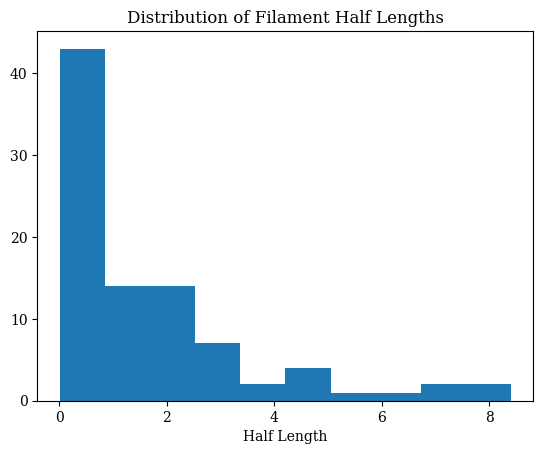

In [313]:
plt.hist(FHL) ; plt.title('Distribution of Filament Half Lengths')
plt.xlabel('Half Length') 

In [323]:
#Try to find full filament lengths (not just half lengths)
fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [458]:
saddles

[{'cp_idx': 2.0,
  'px': -2.81356,
  'py': -2.00726,
  'pz': -1.79707,
  'pair_ID': 6.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[12, 0], [6, 1]],
  'Field Vals': [958.9152,
   5.222504,
   4112.904,
   6.0,
   -1.0,
   -1.0,
   0.6328215,
   4.293599,
   233.1]},
 {'cp_idx': 2.0,
  'px': 0.0720867,
  'py': -5.67172,
  'pz': 2.83266,
  'pair_ID': 32.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[17, 2], [18, 3]],
  'Field Vals': [5.943952,
   5.054332,
   0.4827816,
   32.0,
   -1.0,
   -1.0,
   -0.2362482,
   0.5804326,
   384.1]},
 {'cp_idx': 2.0,
  'px': -1.06399,
  'py': -1.10514,
  'pz': 1.41526,
  'pair_ID': 5.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[20, 6], [22, 7]],
  'Field Vals': [2257.297,
   5.61458,
   6694.024,
   5.0,
   -1.0,
   -1.0,
   0.4722909,
   2.966818,
   1071.1]},
 {'cp_idx': 2.0,
  'px': 5.29703,
  'py': -2.84634,
  'pz': 3.09209,
  'pair_ID': 1.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[5, 11], [1, 12]],
  'Field 

In [733]:
cp1s = np.zeros(len(fils)) ; cp2s = np.zeros(len(fils))

for i, stuff in enumerate(fils):
    cp1s[i] = stuff['cp1_idx'] ; cp2s[i] = stuff['cp2_idx']

cp1s

array([15., 15., 16., 16., 17., 18., 19., 19., 20., 21., 22., 23., 23.,
       24., 24., 25., 25., 26., 27., 28., 28., 29., 30., 31., 32., 33.,
       33., 34., 34., 35., 36., 36., 37., 38., 38., 39., 40., 40., 41.,
       42., 43., 43., 44., 45., 46., 47., 47., 48., 49., 49., 50., 50.,
       51., 52., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.])

In [331]:
cp2s

array([12.,  6., 17., 18.,  4., 11., 20., 22., 21.,  9.,  6.,  5.,  1.,
        1.,  1., 26., 27.,  1.,  4., 29., 31., 30., 14., 32.,  9., 11.,
       22., 35., 10., 12.,  7., 37., 27., 39., 18.,  3., 20., 41., 42.,
        5., 44., 21., 45., 46., 13., 44., 48.,  8.,  0.,  2., 51., 52.,
       42.,  2., 31., 10., 58., 46., 35., 61., 41., 58.,  4., 65., 66.,
       67.,  0., 67., 51.,  0., 29., 37., 30., 32., 26., 17., 52., 39.,
       61., 48., 66., 45., 84.,  7., 65., 84., 46., 18., 26., 13.])

In [457]:
print(cp2s, "\n", np.unique(cp2s, return_counts=True))

[12.  6. 17. 18.  4. 11. 20. 22. 21.  9.  6.  5.  1.  1.  1. 26. 27.  1.
  4. 29. 31. 30. 14. 32.  9. 11. 22. 35. 10. 12.  7. 37. 27. 39. 18.  3.
 20. 41. 42.  5. 44. 21. 45. 46. 13. 44. 48.  8.  0.  2. 51. 52. 42.  2.
 31. 10. 58. 46. 35. 61. 41. 58.  4. 65. 66. 67.  0. 67. 51.  0. 29. 37.
 30. 32. 26. 17. 52. 39. 61. 48. 66. 45. 84.  7. 65. 84. 46. 18. 26. 13.] 
 (array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 17., 18., 20., 21., 22., 26., 27., 29., 30., 31., 32.,
       35., 37., 39., 41., 42., 44., 45., 46., 48., 51., 52., 58., 61.,
       65., 66., 67., 84.]), array([3, 4, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]))


In [456]:
fils[7] #compare against crit_points (saddles)

{'cp1_idx': 19.0,
 'cp2_idx': 22.0,
 'nsamp': 3,
 'px,py,pz': [[-1.06399, -1.10514, 1.41526],
  [-1.65262, -1.40854, 0.747264],
  [-1.79768, -1.44293, 0.163435]],
 'Field Vals': [19.05459, 1.0, 3643.1, 3.298105, 2.0]}

In [453]:
saddles[2] #saddle[0] corresponds to the first two filaments ; saddle[1] to the 3rd and 4th filaments

{'cp_idx': 2.0,
 'px': -1.06399,
 'py': -1.10514,
 'pz': 1.41526,
 'pair_ID': 5.0,
 'boundary': 0.0,
 'nfil': 2,
 'destID,filID': [[20, 6], [22, 7]],
 'Field Vals': [2257.297,
  5.61458,
  6694.024,
  5.0,
  -1.0,
  -1.0,
  0.4722909,
  2.966818,
  1071.1]}

In [427]:
real_saddles = [] #find out what boundary means

N = len(saddles)
for i in range(N):
    if saddles[i]['boundary'] == 0.0:
        real_saddles.append(saddles[i])
len(real_saddles)

12

In [466]:
saddles_nfils = [] ; N = len(saddles) #list of saddles with 'nfils' == 2 (as saddles should be)
for i in range(N): 
    n_fils = 2 #decide here how many nfils we want to check in saddles (only 0, 1, 2 exist)
    if saddles[i]['nfil'] == n_fils: 
        saddles_nfils.append(saddles[i])
len(saddles_nfils)

16

In [467]:
saddles_nfils

[{'cp_idx': 2.0,
  'px': -2.81356,
  'py': -2.00726,
  'pz': -1.79707,
  'pair_ID': 6.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[12, 0], [6, 1]],
  'Field Vals': [958.9152,
   5.222504,
   4112.904,
   6.0,
   -1.0,
   -1.0,
   0.6328215,
   4.293599,
   233.1]},
 {'cp_idx': 2.0,
  'px': 0.0720867,
  'py': -5.67172,
  'pz': 2.83266,
  'pair_ID': 32.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[17, 2], [18, 3]],
  'Field Vals': [5.943952,
   5.054332,
   0.4827816,
   32.0,
   -1.0,
   -1.0,
   -0.2362482,
   0.5804326,
   384.1]},
 {'cp_idx': 2.0,
  'px': -1.06399,
  'py': -1.10514,
  'pz': 1.41526,
  'pair_ID': 5.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[20, 6], [22, 7]],
  'Field Vals': [2257.297,
   5.61458,
   6694.024,
   5.0,
   -1.0,
   -1.0,
   0.4722909,
   2.966818,
   1071.1]},
 {'cp_idx': 2.0,
  'px': 5.29703,
  'py': -2.84634,
  'pz': 3.09209,
  'pair_ID': 1.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[5, 11], [1, 12]],
  'Field 

In [483]:
sad_points = np.zeros(len(saddles_nfils)) ; sad_points2 = np.zeros(len(saddles_nfils))

for i, stuff in enumerate(saddles_nfils): 
    sad_points[i] = saddles_nfils[i]['destID,filID'][0][0]
    sad_points2[i] = saddles_nfils[i]['destID,filID'][1][0]
sad_points = np.append(sad_points, sad_points2) ; sad_points = np.sort(sad_points)
sad_points #gives array of all the destID values from saddles_nfils

array([ 0.,  1.,  1.,  1.,  2.,  5.,  6.,  7., 10., 11., 12., 17., 18.,
       18., 20., 20., 21., 22., 22., 26., 27., 29., 31., 35., 37., 39.,
       41., 44., 44., 48., 51., 52.])

In [472]:
saddles_nfils[0]['destID,filID']

[[12, 0], [6, 1]]

In [484]:
np.sort(cp2s)

array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,  3.,  4.,  4.,  4.,
        5.,  5.,  6.,  6.,  7.,  7.,  8.,  9.,  9., 10., 10., 11., 11.,
       12., 12., 13., 13., 14., 17., 17., 18., 18., 18., 20., 20., 21.,
       21., 22., 22., 26., 26., 26., 27., 27., 29., 29., 30., 30., 31.,
       31., 32., 32., 35., 35., 37., 37., 39., 39., 41., 41., 42., 42.,
       44., 44., 45., 45., 46., 46., 46., 48., 48., 51., 51., 52., 52.,
       58., 58., 61., 61., 65., 65., 66., 66., 67., 67., 84., 84.])

In [637]:
cp1s

array([15., 15., 16., 16., 17., 18., 19., 19., 20., 21., 22., 23., 23.,
       24., 24., 25., 25., 26., 27., 28., 28., 29., 30., 31., 32., 33.,
       33., 34., 34., 35., 36., 36., 37., 38., 38., 39., 40., 40., 41.,
       42., 43., 43., 44., 45., 46., 47., 47., 48., 49., 49., 50., 50.,
       51., 52., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.])

In [638]:
#take array of filaments that have equal cp1s - just create a mask? 
np.unique(cp1s, return_counts=True, return_index=True)

(array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
        69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
        82., 83., 84., 85., 86., 87., 88., 89., 90.]),
 array([ 0,  2,  4,  5,  6,  8,  9, 10, 11, 13, 15, 17, 18, 19, 21, 22, 23,
        24, 25, 27, 29, 30, 32, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 47,
        48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89]),
 array([2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2,
        1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 

In [634]:
#create custom mask?
M = np.unique(cp1s, return_counts=True, return_index=True)
indices = M[1] ; CP1s = M[0]
indices

array([ 0,  2,  4,  5,  6,  8,  9, 10, 11, 13, 15, 17, 18, 19, 21, 22, 23,
       24, 25, 27, 29, 30, 32, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 47,
       48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89])

In [630]:
#create mask? 
M = np.unique(cp1s, return_counts=True, return_index=True)
counts = M[2]
counts

array([2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [743]:
M[2].shape

(74,)

In [649]:
M[0]

array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90.])

In [668]:
mask = np.ma.masked_where(counts != 2, M[0]) #why you have to use != , I have no idea but works
new_CP1s = np.ma.masked_where(np.ma.getmask(mask), M[0])
double_CP1s = np.ma.compressed(new_CP1s)
double_CP1s

array([15., 16., 19., 23., 24., 25., 28., 33., 34., 36., 38., 40., 43.,
       47., 49., 50.])

In [676]:
#NOW do the loop 
N = len(fils) ; double_fils = []

for i in range(N): 
    if np.any(double_CP1s == fils[i]['cp1_idx']):
        double_fils.append(fils[i])
len(double_fils) # voila! now we have all the filaments that have exactly two of the same cp1_idx value

32

In [876]:
cp1s

array([15., 15., 16., 16., 17., 18., 19., 19., 20., 21., 22., 23., 23.,
       24., 24., 25., 25., 26., 27., 28., 28., 29., 30., 31., 32., 33.,
       33., 34., 34., 35., 36., 36., 37., 38., 38., 39., 40., 40., 41.,
       42., 43., 43., 44., 45., 46., 47., 47., 48., 49., 49., 50., 50.,
       51., 52., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.])

In [875]:
np.unique(cp2s)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 17., 18., 20., 21., 22., 26., 27., 29., 30., 31., 32.,
       35., 37., 39., 41., 42., 44., 45., 46., 48., 51., 52., 58., 61.,
       65., 66., 67., 84.])

In [ ]:
 = np.unique(cp2s, return_counts=True, return_index=True)
counts = M[2]
mask = np.ma.masked_where(counts != 2, M[0]) #why you have to use != , I have no idea but works
new_CP1s = np.ma.masked_where(np.ma.getmask(mask), M[0])
double_CP1s = np.ma.compressed(new_CP1s)
double_CP1s

In [ ]:
#for cp2_idx?
N = len(fils) ; double_fils2 = []

for i in range(N): 
    if np.any(double_CP1s == fils[i]['cp2_idx']):
        double_fils2.append(fils[i])
len(double_fils2) # voila! now we have all the filaments that have exactly two of the same cp1_idx value

In [695]:
double_fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [746]:
#come back to this!!!!! logging off
empty = []
for i in range(0, len(double_fils), 2):
    for j in range(i+2, len(double_fils) - 1, 2):
        if double_fils[i]['cp1_idx'] == double_fils[j]['cp1_idx']:
            empty.append(double_fils[i]['cp1_idx'])

[]

In [755]:
empty = []
for i in range(0, len(fils), 2):
    for j in range(i+2, len(fils) - 1, 2):
        if cp1s[i] == cp1s[j]:
            print(cp1s[j])


In [758]:
np.count_nonzero(cp1s==15)

2

In [766]:
for i in range(len(cp1s)): #voila!
    print(np.count_nonzero(cp1s==cp1s[i]))

2
2
2
2
1
1
2
2
1
1
1
2
2
2
2
2
2
1
1
2
2
1
1
1
1
2
2
2
2
1
2
2
1
2
2
1
2
2
1
1
2
2
1
1
1
2
2
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [799]:
cp1s.shape

(90,)

In [805]:
full_fils = []
for i in range(len(fils)):
    if (np.count_nonzero(cp1s==cp1s[i])) == 2:
        full_fils.append(fils[i])
len(full_fils) ## nice! ok this worked

32

In [808]:
ff_cps = np.zeros(len(full_fils))
for i in range(len(full_fils)): #check that this worked
    ff_cps[i] = full_fils[i]['cp1_idx']
ff_cps # it worked! -- but wait, this just did the same thing
#the difficulty is in applyig math to just two elements at a time

array([15., 15., 16., 16., 19., 19., 23., 23., 24., 24., 25., 25., 28.,
       28., 33., 33., 34., 34., 36., 36., 38., 38., 40., 40., 43., 43.,
       47., 47., 49., 49., 50., 50.])

In [817]:
empty = []
for i in range(0, len(ff_cps), 2):
    for j in range(i + 2, len(ff_cps) - 1, 2):
        if ff_cps[i] == ff_cps[j]:
            empty.append(full_fils[i]) 
            #empty.append(full_fils[j])
len(empty)

0

In [819]:
ff_cps

array([15., 15., 16., 16., 19., 19., 23., 23., 24., 24., 25., 25., 28.,
       28., 33., 33., 34., 34., 36., 36., 38., 38., 40., 40., 43., 43.,
       47., 47., 49., 49., 50., 50.])

In [822]:
len(ff_cps)

32

In [828]:
for i in range(0, len(ff_cps), 2):
    print(ff_cps[i] + ff_cps[i]) #this works! ok do that for the fils list dict. 

30.0
32.0
38.0
46.0
48.0
50.0
56.0
66.0
68.0
72.0
76.0
80.0
86.0
94.0
98.0
100.0


In [841]:
N = len(full_fils) ; arr = np.zeros(N) ; empty = []
for i in range(0, N, 2):
    arr[i] = full_fils[i]['cp1_idx']
    if arr[i] == arr[i]:
        empty.append(arr[i])
empty

[15.0,
 16.0,
 19.0,
 23.0,
 24.0,
 25.0,
 28.0,
 33.0,
 34.0,
 36.0,
 38.0,
 40.0,
 43.0,
 47.0,
 49.0,
 50.0]

In [847]:
d_coordinates = [] ## didn't work, only skipped over two instead of add 
for i in range(0, N, 2):
    arr[i] = full_fils[i]['cp1_idx']
    if arr[i] == arr[i]:
            c = full_fils[i]['px,py,pz']
            d_coordinates.append(c)
            d_coords = []
            for i in range(len(d_coordinates)):
                array = np.array(d_coordinates[i])
                d_coords.append(array)

            n = len(d_coords) ; flengths = np.zeros(n)
            for i in range(n): 
                 filament = d_coords[i]
                 d = distance(filament)
                 flengths[i] = d
flengths #no way this worked -- check against ful_fils half lengths' 

array([3.04622387, 4.46305645, 1.88053861, 1.7629589 , 0.51346064,
       3.06344187, 0.65514096, 2.87476416, 0.98301088, 6.88707645,
       2.26929474, 2.77129877, 4.55451502, 1.39306017, 0.54264338,
       1.47077178])

In [858]:
n = len(double_fils) ; empty = np.zeros(n)
for i in range(n): 
    empty[i] = double_fils[i]['cp1_idx']
empty #just checking double_fils is same as full_fils -- it is (confusingly) - I made the same array two different ways 

array([15., 15., 16., 16., 19., 19., 23., 23., 24., 24., 25., 25., 28.,
       28., 33., 33., 34., 34., 36., 36., 38., 38., 40., 40., 43., 43.,
       47., 47., 49., 49., 50., 50.])

In [859]:
fil_lengths

array([3.04622387, 3.11229748, 4.46305645, 4.31058284, 1.88053861,
       1.54317677, 1.7629589 , 0.90200784, 0.51346064, 0.35515462,
       3.06344187, 0.95560629, 0.65514096, 2.75730762, 2.87476416,
       0.75524065, 0.98301088, 0.64256679, 6.88707645, 2.27856971,
       2.26929474, 2.0326806 , 2.77129877, 2.32362872, 4.55451502,
       1.76486823, 1.39306017, 1.88171531, 0.54264338, 0.30794771,
       1.47077178, 1.97264631])

In [862]:
#Since these are ordered in even pairs -- take the easy way out (for now) and add the two elements of each to get full filament length
a = empty[:-1] ; b = empty[1]
a + b #math adds up 

array([30., 30., 31., 31., 34., 34., 38., 38., 39., 39., 40., 40., 43.,
       43., 48., 48., 49., 49., 51., 51., 53., 53., 55., 55., 58., 58.,
       62., 62., 64., 64., 65.])

In [865]:
#now do this for the distances in 'fil_lengths'
a = fil_lengths[:-1] ; b = fil_lengths[1:]
full_fil_lengths = a + b
full_fil_lengths # no, this isnt it (should be sums)

array([6.15852136, 7.57535394, 8.7736393 , 6.19112145, 3.42371537,
       3.30613566, 2.66496674, 1.41546848, 0.86861526, 3.41859648,
       4.01904815, 1.61074725, 3.41244859, 5.63207179, 3.63000482,
       1.73825153, 1.62557766, 7.52964323, 9.16564616, 4.54786445,
       4.30197534, 4.80397937, 5.0949275 , 6.87814374, 6.31938324,
       3.1579284 , 3.27477548, 2.42435869, 0.85059109, 1.77871949,
       3.44341808])

In [868]:
full_fil_lengths = [sum(fil_lengths[i:i+2]) for i in range(0, len(fil_lengths), 2)]
full_fil_lengths

[6.1585213574618,
 8.77363929604724,
 3.4237153728647893,
 2.664966739862236,
 0.8686152566100356,
 4.019048154847868,
 3.4124485889680156,
 3.6300048181908275,
 1.625577662847189,
 9.165646158218893,
 4.301975338706564,
 5.0949274975843455,
 6.319383244763077,
 3.2747754752054354,
 0.8505910905237106,
 3.443418082145338]

In [871]:
#check against fil_lengths: 
fil_lengths[2] + fil_lengths[3] #voila! 

8.77363929604724

Text(0.5, 1.0, "Distribution of Entire Filament Lenghts \n(for filaments with same 'cp1_idx' value)")

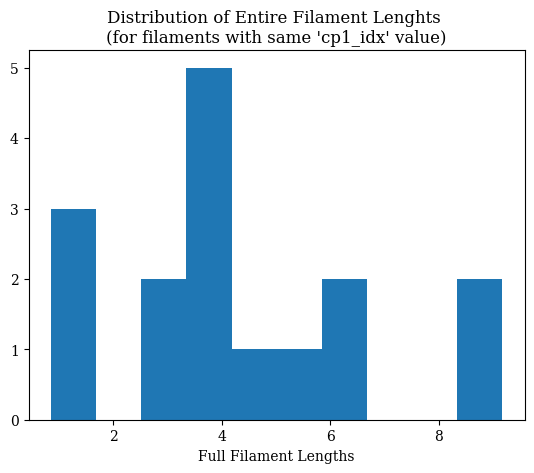

In [873]:
plt.hist(full_fil_lengths) ; plt.xlabel('Full Filament Lengths')
plt.title('Distribution of Entire Filament Lenghts \n(for filaments with same \'cp1_idx\' value)')

In [836]:
a = [1, "A", 2, "B", 1, "C"]
empty = []

for i in range(0, len(a), 2):
    for j in range(i + 2, len(a) - 1, 2):
        if a[i] == a[j]:
            empty.append(a[i])
            empty.append(a[j])
empty

[1, 1]

In [852]:
#NOW apply the distance function from earlier -- first redefine coordinates
N = len(double_fils) ; dcoordinates = []
for i in range(N): 
    c = double_fils[i]['px,py,pz']
    dcoordinates.append(c)

dcoords = []
for i in range(len(dcoordinates)):
    array = np.array(dcoordinates[i])
    dcoords.append(array)

len(dcoords)

32

In [853]:
N = len(dcoords)
fil_lengths = np.zeros(N)

for i in range(N): 
    filament = dcoords[i]
    d = distance(filament)
    fil_lengths[i] = d
fil_lengths #still half filament lengths, but for more selective filaments

array([3.04622387, 3.11229748, 4.46305645, 4.31058284, 1.88053861,
       1.54317677, 1.7629589 , 0.90200784, 0.51346064, 0.35515462,
       3.06344187, 0.95560629, 0.65514096, 2.75730762, 2.87476416,
       0.75524065, 0.98301088, 0.64256679, 6.88707645, 2.27856971,
       2.26929474, 2.0326806 , 2.77129877, 2.32362872, 4.55451502,
       1.76486823, 1.39306017, 1.88171531, 0.54264338, 0.30794771,
       1.47077178, 1.97264631])

Text(0.5, 1.0, 'Distribution of half filament lenghts \nfor filaments that have 2 of the same cp1_idx')

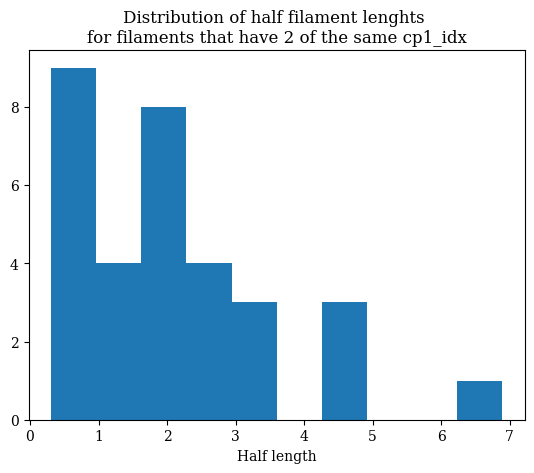

In [693]:
plt.hist(fil_lengths) ; plt.xlabel("Half length")
plt.title("Distribution of half filament lenghts \nfor filaments that have 2 of the same cp1_idx")

In [449]:
N = len(saddles) ; pairIDs = np.zeros(N)
for i in range(N):
    pairIDs[i] = saddles[i]['pair_ID']
print(pairIDs,"\n\n", np.unique(pairIDs, return_counts=True)) #pairIDs for saddles

[  6.  32.   5.   1.  31.   4.  14.  11.  10.   7.   3.   9.  12.   8.
   0.   2.  66.  77.  90.  76. 105.  89.  72.  95.  88.  75.  92.  91.
  99.  74.  67.  98.  78.  71.  81. 100.  93. 106.  87. 102.  96.  70.
  69.  82.  97.  68.] 

 (array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  14.,  31.,  32.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  74.,  75.,  76.,  77.,  78.,  81.,  82.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  95.,  96.,  97.,  98.,  99., 100., 102.,
       105., 106.]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1]))


In [448]:
N = len(crit_points) ; pairIDs = np.zeros(N)
for i in range(N):
    pairIDs[i] = crit_points[i]['pair_ID']
print(pairIDs,"\n\n", np.unique(pairIDs, return_counts=True))  #pair IDs for all critical points 

[ 29.  18.  30.  25.  20.  17.  15.  24.  28.  26.  23.  22.  27.  13.
  21.   6.  32.  -1.  -1.   5.  -1.  -1.  -1.   1.  31.   4.  -1.  -1.
  14.  -1.  -1.  -1.  -1.  11.  10.  -1.   7.  -1.   3.  -1.   9.  -1.
  -1.  12.  -1.  -1.  -1.   8.  -1.   0.   2.  -1.  -1.  19.  16.  66.
  77.  90.  -1.  76. 105.  -1.  89.  72.  95.  -1.  -1.  -1.  88.  75.
  92.  91.  99.  74.  67.  98.  78.  71.  81. 100.  93. 106.  87. 102.
  -1.  96.  70.  69.  82.  97.  68.  33.  48.  64.  61.  60.  51.  39.
 109.  47.  42.  34.  50.  80.  52.  62. 107. 111. 113. 117.  57.  41.
  38.  35.  45.  44.  94.  40.  59.  63.  49.  46.  53. 101.  58. 103.
  55.  37.  56.  83. 108.  73. 110.  84. 112.  85. 114. 115. 116.  86.
 118. 119.] 

 (array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  37.,  38.,  39.,  40., 

****It seems that saddles correspond to filaments in 'destID,filID' : [[cp2_idx_FHS(1), filID], [cp2_idx_FHS(2), filID]]****

### PERSISTENCE

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type


In [13]:
fils #first field value is 'field_value' (density?)

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [14]:
field_vals = np.zeros(len(fils))
for i in range(len(fils)):
    field_vals[i] = fils[i]['Field Vals'][0]
field_vals

array([4.293599e+00, 4.293599e+00, 6.666538e+00, 9.822229e+01,
       4.208091e+02, 1.116293e+01, 1.116293e+01, 1.905459e+01,
       3.954093e+03, 1.709065e+04, 4.293599e+00, 4.897339e+00,
       4.897339e+00, 6.159156e+00, 6.974177e+00, 5.819070e+01,
       4.117198e+03, 5.804326e-01, 6.415988e-01, 1.484359e+00,
       1.008729e+00, 7.096833e-01, 7.096833e-01, 7.232254e+00,
       2.401066e+01, 5.804326e-01, 5.804326e-01, 1.350540e+00,
       2.482881e+01, 2.784265e+02, 3.795919e+02, 2.401066e+01,
       2.004924e+01, 2.004924e+01, 3.263438e+02, 2.059768e+03,
       3.795919e+02, 1.782272e+03, 2.966818e+00, 2.966818e+00,
       4.383325e+00, 8.503426e+01, 3.035701e+02, 1.025097e+03,
       2.966818e+00, 3.021088e+00, 3.883038e+01, 1.025097e+03,
       7.784111e+02, 7.784111e+02, 6.721809e+01, 3.426105e+01,
       3.426105e+01, 6.930618e+01, 8.502258e+01, 8.502258e+01,
       1.491609e+03, 1.491609e+03, 1.944318e+03, 1.944318e+03,
       1.944318e+03, 1.727924e+03, 1.727924e+03, 5.0637

In [63]:
logfield_vals = np.zeros(len(fils))
for i in range(len(fils)):
    logfield_vals[i] = fils[i]['Field Vals'][4] #log_field_value
logfield_vals

array([ 0.6328215 ,  0.738786  ,  1.719699  ,  2.414164  ,  2.334426  ,
        1.047778  ,  1.179229  ,  3.298105  ,  4.022114  ,  4.022114  ,
        0.6623298 ,  0.6899601 ,  0.7425875 ,  0.817345  ,  1.512984  ,
        3.319667  ,  3.319667  , -0.2139476 ,  0.02652461,  0.09570752,
       -0.0659027 , -0.1489354 ,  0.5988965 ,  1.193721  ,  1.193721  ,
       -0.2362482 , -0.0152538 ,  1.116929  ,  2.180778  ,  2.517208  ,
        2.517208  ,  1.343013  ,  1.302098  ,  2.238539  ,  3.076661  ,
        3.076661  ,  3.033798  ,  3.033798  ,  0.4722909 ,  0.5652658 ,
        1.650393  ,  2.288478  ,  2.822386  ,  2.822386  ,  0.476245  ,
        1.320681  ,  1.320681  ,  2.955088  ,  2.891209  ,  2.62615   ,
        1.705347  ,  1.534801  ,  1.714192  ,  1.887417  ,  1.929534  ,
        2.8967    ,  3.173655  ,  3.235014  ,  3.235014  ,  3.288767  ,
        3.263901  ,  3.237525  ,  3.53095   ,  3.53095   ,  3.317648  ,
        3.317648  ,  0.2567534 ,  1.763171  ,  2.057381  ,  2.38

In [70]:
type_vals = np.zeros(len(fils))
for i in range(len(fils)):
    type_vals[i] = fils[i]['Field Vals'][4] #type
type_vals

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.])

Text(0.5, 1.0, 'Distribution of Densities in Filaments')

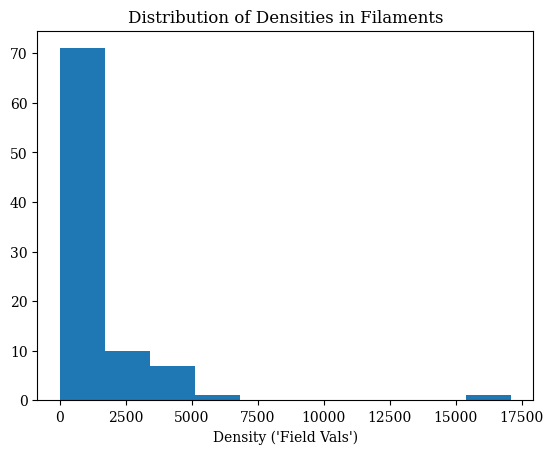

In [67]:
plt.hist(field_vals) ; plt.xlabel('Density (\'Field Vals\')')
plt.title('Distribution of Densities in Filaments')

Text(0.5, 1.0, 'Distribution of Log Densities in Filaments')

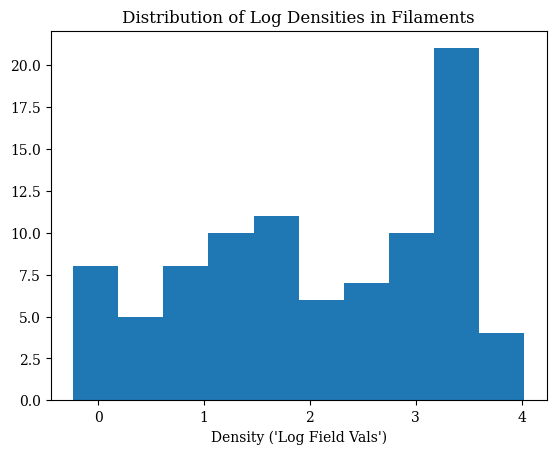

In [69]:
plt.hist(logfield_vals) ; plt.xlabel('Density (\'Log Field Vals\')')
plt.title('Distribution of Log Densities in Filaments')

In [18]:
crit_points #CP field: persistence_ratio ; CP field: persistence_nsigmas  ;  CP field: persistence

[{'cp_idx': 3.0,
  'px': 5.24243,
  'py': 0.603427,
  'pz': 6.55434,
  'pair_ID': 29.0,
  'boundary': 0.0,
  'nfil': 3,
  'destID,filID': [[49, 48], [67, 66], [70, 69]],
  'Field Vals': [649.3622,
   5.034659,
   10623.39,
   29.0,
   2.0,
   2.0,
   4.026932,
   10639.77,
   19.0]},
 {'cp_idx': 3.0,
  'px': 5.72685,
  'py': -3.57222,
  'pz': 3.31045,
  'pair_ID': 18.0,
  'boundary': 0.0,
  'nfil': 4,
  'destID,filID': [[23, 12], [24, 13], [24, 14], [26, 17]],
  'Field Vals': [2016.713,
   5.564442,
   3640.677,
   18.0,
   5.0,
   5.0,
   3.561398,
   3642.484,
   41.0]},
 {'cp_idx': 3.0,
  'px': 5.06727,
  'py': 0.175575,
  'pz': 5.8821,
  'pair_ID': 30.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[49, 49], [52, 53]],
  'Field Vals': [6525.978,
   6.0677,
   11149.95,
   30.0,
   12.0,
   12.0,
   4.04734,
   11151.66,
   279.0]},
 {'cp_idx': 3.0,
  'px': -1.91252,
  'py': -4.48546,
  'pz': 6.08865,
  'pair_ID': 25.0,
  'boundary': 1.0,
  'nfil': 1,
  'destID,filID': [[39, 3

In [ ]:
N = len(crit_points)  
CP_pr = np.zeros(N) ; CP_nsigmas = np.zeros(N) ; CP_pers = np.zeros(N)
for i in range(N): 
    CP_pr[i] = crit_points[i]['Field Vals'][0] #persistence ratio 
    CP_nsigmas[i] = crit_points[i]['Field Vals'][1] #persistence n_sigmas
    CP_pers[i] = crit_points[i]['Field Vals'][2] #persistence

Text(0.5, 1.0, 'Persistence Ratios for all Critical Points')

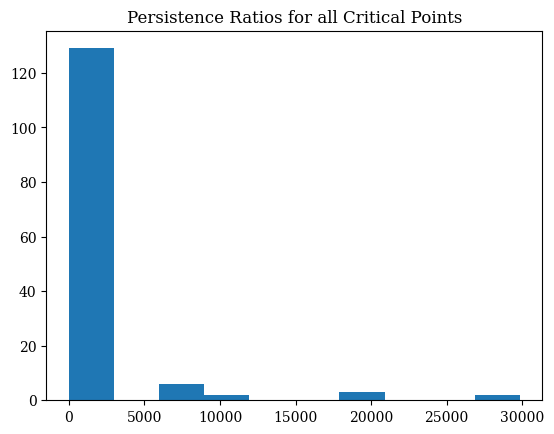

In [55]:
plt.hist(CP_pr) 
plt.title('Persistence Ratios for all Critical Points')

Text(0.5, 1.0, 'nSigmas for all Critical Points')

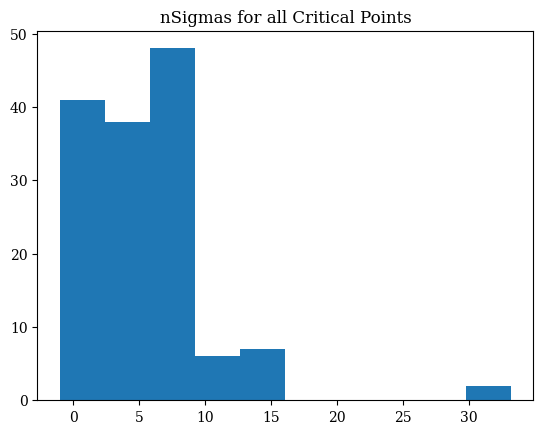

In [56]:
plt.hist(CP_nsigmas)
plt.title('nSigmas for all Critical Points')

(array([129.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.]),
 array([-1.0000000e+000,  1.7976930e+307,  3.5953860e+307,  5.3930790e+307,
         7.1907720e+307,  8.9884650e+307,  1.0786158e+308,  1.2583851e+308,
         1.4381544e+308,  1.6179237e+308,  1.7976930e+308]),
 <BarContainer object of 10 artists>)

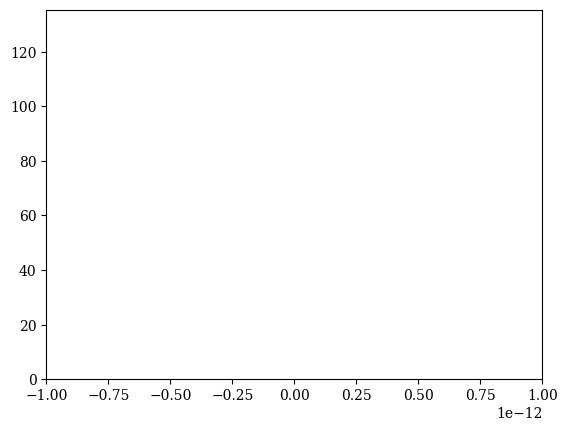

In [58]:
plt.hist(CP_pers)
plt.title('Persistence for All Critical Points')

In [61]:
CP_pers

array([ 1.062339e+004,  3.640677e+003,  1.114995e+004,  2.510638e+003,
        2.058822e+003,  6.694024e+003,  4.112904e+003,  5.124321e+003,
        2.267731e+004,  5.058324e+003,  2.398300e+003,  1.779923e+003,
        1.708805e+004,  1.797693e+308,  1.116240e+004,  4.112904e+003,
        4.827816e-001, -1.000000e+000, -1.000000e+000,  6.694024e+003,
       -1.000000e+000, -1.000000e+000, -1.000000e+000,  3.640677e+003,
        4.826574e+001,  2.058822e+003, -1.000000e+000, -1.000000e+000,
        1.116240e+004, -1.000000e+000, -1.000000e+000, -1.000000e+000,
       -1.000000e+000,  1.779923e+003,  2.398300e+003, -1.000000e+000,
        5.124321e+003, -1.000000e+000,  2.510638e+003, -1.000000e+000,
        5.058324e+003, -1.000000e+000, -1.000000e+000,  1.708805e+004,
       -1.000000e+000, -1.000000e+000, -1.000000e+000,  2.267731e+004,
       -1.000000e+000,  1.062339e+004,  1.114995e+004, -1.000000e+000,
       -1.000000e+000,  4.826574e+001,  4.827816e-001,  1.753648e+001,
      